## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import ngrams, FreqDist

## Workflow

In [12]:
from nltk.corpus import brown, gutenberg, inaugural, stopwords
# Number of Sentences, Word Frequency, Mean Sentence Length
from tqdm import tqdm
import string 

num_sents_arr = []
num_vocab_arr = []
mean_size_arr = []
avg_word_freq = []
tot_word_freq = {}

stopwords = set(stopwords.words('english'))

for fileid in tqdm(gutenberg.fileids()):
    if fileid == 'bible-kjv.txt' or 'shakespeare' in fileid:
        continue
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) 
    
    for curr_word in gutenberg.words(fileid):
        curr_word = curr_word.lower()
        if curr_word not in string.punctuation and curr_word not in stopwords:
            if curr_word in tot_word_freq:
                tot_word_freq[curr_word] += 1
            else:
                tot_word_freq[curr_word] = 1
    
    num_sents_arr.append(num_sents)
    mean_size_arr.append(num_words / num_sents)
    num_vocab_arr.append(num_vocab)
    avg_word_freq.append(num_words / num_vocab)
    
    # average sentence length, and the number of times each vocabulary item appears in the text on average 
#     print(round(num_words/num_sents), round(num_words/num_vocab), fileid)

for fileid in tqdm(brown.fileids()):
    num_words = len(brown.words(fileid))
    num_sents = len(brown.sents(fileid))
    num_vocab = len(set(w.lower() for w in brown.words(fileid)))
    
    for curr_word in brown.words(fileid):
        curr_word = curr_word.lower()
        if curr_word not in string.punctuation and curr_word not in stopwords:
            if curr_word in tot_word_freq:
                tot_word_freq[curr_word] += 1
            else:
                tot_word_freq[curr_word] = 1
    
    num_sents_arr.append(num_sents)
    mean_size_arr.append(num_words / num_sents)
    num_vocab_arr.append(num_vocab)
    avg_word_freq.append(num_words / num_vocab)
    
    # average sentence length, and the number of times each vocabulary item appears in the text on average 
#     print(round(num_words/num_sents), round(num_words/num_vocab), fileid) 

for fileid in tqdm(inaugural.fileids()):
    if fileid == '2017-Trump.txt':
        continue
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    num_vocab = len(set(w.lower() for w in inaugural.words(fileid)))
    
    for curr_word in inaugural.words(fileid):
        curr_word = curr_word.lower()
        if curr_word not in string.punctuation and curr_word not in stopwords:
            if curr_word in tot_word_freq:
                tot_word_freq[curr_word] += 1
            else:
                tot_word_freq[curr_word] = 1
    
    num_sents_arr.append(num_sents)
    mean_size_arr.append(num_words / num_sents)
    num_vocab_arr.append(num_vocab)
    avg_word_freq.append(num_words / num_vocab)

100%|██████████| 58/58 [00:00<00:00, 78.40it/s]


In [13]:
from heapq import heappush, nlargest

'''
PROCESS TOTAL ENG CORPUS STATISTICS -- AMONG ALL CORPORA
'''

tot_sents = sum(num_sents_arr)
print('The total number of sentences is %d.' %tot_sents)
tot_vocab = sum(num_vocab_arr)
print('The total number of unique words is %d.' %tot_vocab)
mean_sent_size = sum(mean_size_arr)/len(mean_size_arr)
print('The mean sentence length is %f.' %mean_sent_size)
mean_vocab_size = sum(avg_word_freq)/len(avg_word_freq)
print('The mean number of times each vocab word appears in this corporus is %f.'%mean_vocab_size)

word_freq = []
for key, value in tot_word_freq.items():
    heappush(word_freq, (key, value))
nlargest(30, word_freq, key=lambda r:r[1])

The total number of sentences is 123573.
The total number of unique words is 524390.
The mean sentence length is 22.931426.
The mean number of times each vocab word appears in this corporus is 3.405128.


[('--', 9240),
 ('``', 8837),
 ("''", 8791),
 ('one', 7678),
 ('said', 7388),
 ('would', 6350),
 ('."', 5820),
 ('could', 5035),
 (',"', 4723),
 ('man', 4050),
 ('like', 3989),
 ('time', 3782),
 ('little', 3665),
 ('must', 3447),
 ('well', 3131),
 ('may', 3124),
 ('see', 3005),
 ('much', 2973),
 ('two', 2952),
 ('good', 2910),
 ('first', 2907),
 ('know', 2904),
 ('great', 2820),
 ('upon', 2705),
 ('never', 2577),
 ('made', 2559),
 ('us', 2504),
 ('new', 2498),
 ('every', 2439),
 ('old', 2402)]

Known pre-processing: Lower-case all words for consistency. Filter for punctuation and stop-words. Delete Trump's inauguration address.

Filter out Bible, Shakespeare pieces.

In [16]:
# Number of Sentences, Word Frequency, Mean Sentence Length

trump_dat = open('/Users/schen1337/Documents/text_style_transfer/data/text_data/orig/trump_all_data.txt', 'rb')

num_words = 0
num_sents = 0
num_vocab = set()

mean_sents_size = []
mean_vocab_size = []

tot_word_freq = {}

for line in trump_dat:
    num_sents += 1
    for word in line.split(b' '):
        try: 
            word = word.decode("utf-8") 
        except:
            continue
        word = word.lower()
        num_words += 1
        num_vocab.add(word)
        if word not in string.punctuation and word not in stopwords:
            if word in tot_word_freq:
                tot_word_freq[word] += 1
            else:
                tot_word_freq[word] = 1
    mean_sents_size.append(num_words / num_sents)
    mean_vocab_size.append(num_words / len(num_vocab))

In [17]:
'''
PROCESS TOTAL TRUMP CORPUS STATISTICS -- AMONG ALL CORPORA
'''

print('The total number of sentences is %d.' %num_sents)
print('The total number of unique words is %d.' %len(num_vocab))
mean_sents_size = sum(mean_sents_size)/len(mean_sents_size)
print('The mean sentence length is %f.' %mean_sents_size)
mean_vocab_size = sum(mean_vocab_size)/len(mean_vocab_size)
print('The mean number of times each vocab word appears in this corporus is %f.'%mean_vocab_size)

word_freq = []
for key, value in tot_word_freq.items():
    heappush(word_freq, (key, value))
nlargest(30, word_freq, key=lambda r:r[1])

The total number of sentences is 25038.
The total number of unique words is 16022.
The mean sentence length is 10.279577.
The mean number of times each vocab word appears in this corporus is 11.922328.


[('going', 2585),
 ('people', 1306),
 ('—', 1257),
 ('want', 973),
 ('know', 874),
 ('dont', 858),
 ('think', 853),
 ('it.\n', 848),
 ('get', 827),
 ('great', 822),
 ('like', 812),
 ('one', 780),
 ('im', 759),
 ('theyre', 670),
 ('know,', 657),
 ('said', 536),
 ('go', 532),
 ('said,', 532),
 ('would', 531),
 ('many', 512),
 ('\n', 488),
 ('thats', 488),
 ('lot', 486),
 ('thank', 486),
 ('say', 485),
 ('make', 474),
 ('got', 466),
 ('really', 438),
 ('country', 423),
 ('that.\n', 422)]

## Word Freq Analysis

In [6]:
def word_freq_analysis(path):
    f = open(path, "r", errors="ignore")
    text = f.read()
    words = text.split()
    print("Num Words in Corpus:", len(words))
    freq_1_grams = FreqDist(ngrams(words, 1))
    print("Num Unique Words in Corpus:", len(freq_1_grams))
    words_by_freq = freq_1_grams.most_common(len(freq_1_grams))
    freqs = [words_by_freq[i][1] for i in range(len(words_by_freq))]
    return words, freq_1_grams, words_by_freq, freqs
    

In [11]:
def plot_log_freq(freqs, words):
    plt.plot(np.log(freqs))
    plt.title("Vocab Log Frequencies (Total: " + str(len(words)) + " Words)")
    plt.xlabel("Word Index")
    plt.ylabel("Log Frequency")
    plt.show()

In [15]:
def calc_top_pct_ratio_of_total_counts(pct, freqs, words):
    total = 0
    for i in range(pct*len(freqs)//100):
        total += freqs[i]
    return round(total/len(words), 4)

#### Full Text

In [21]:
path = "../yelp/full_text.txt"
full_words, full_freq_1_grams, full_words_by_freq, full_freqs = word_freq_analysis(path)

Num Words in Corpus: 2656242
Num Unique Words in Corpus: 160136


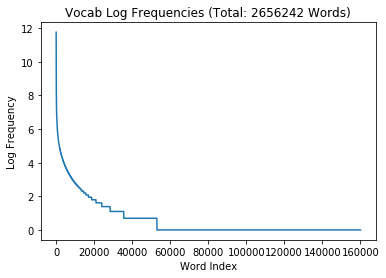

In [22]:
plot_log_freq(full_freqs, full_words)

In [33]:
calc_top_pct_ratio_of_total_counts(9, full_freqs, full_words)

0.9084

#### English Text

In [24]:
path = "orig/en_all_data_lower.txt"
en_words, en_freq_1_grams, en_words_by_freq, en_freqs = word_freq_analysis(path)

Num Words in Corpus: 1850485
Num Unique Words in Corpus: 52702


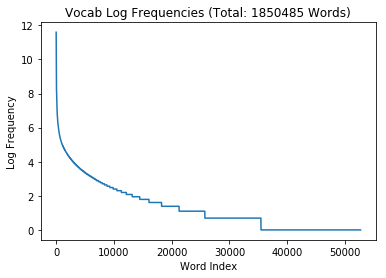

In [25]:
plot_log_freq(en_freqs, en_words)

In [31]:
calc_top_pct_ratio_of_total_counts(11, en_freqs, en_words)

0.8975

#### Trump Text

In [27]:
path = "orig/trump_all_data_sent_per_line_lower.txt"
trump_words, trump_freq_1_grams, trump_words_by_freq, trump_freqs = word_freq_analysis(path)

Num Words in Corpus: 974603
Num Unique Words in Corpus: 64714


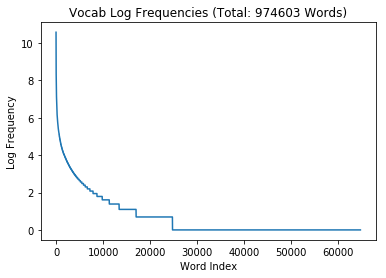

In [28]:
plot_log_freq(trump_freqs, trump_words)

In [32]:
calc_top_pct_ratio_of_total_counts(11, trump_freqs, trump_words)

0.8967